In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [27]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [28]:
df.shape


(42000, 785)

In [29]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6247,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
import matplotlib.pyplot as plt 

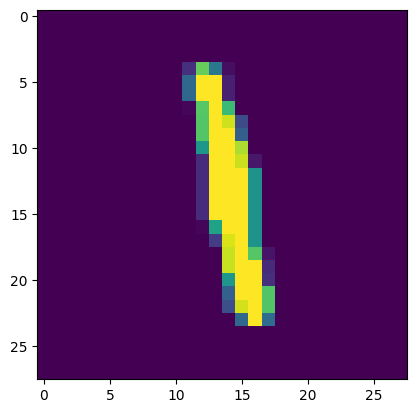

In [31]:
plt.imshow(df.iloc[41831,1:].values.reshape(28,28))

In [32]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [34]:
x_train.shape

(33600, 784)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn= KNeighborsClassifier()

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
import time 
start= time.time()
y_pred = knn.predict(x_test)
print(time.time()- start)

14.150397777557373


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [42]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 100)

In [43]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [48]:
x_train_trf.shape

(33600, 100)

In [45]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn.predict(x_test_trf)

In [51]:
accuracy_score(y_test,y_pred)

0.9546428571428571

In [ ]:
for i in range (1,785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    
    knn = KNeighborsClassifier()
    
    
    knn.fit(x_train_trf,y_train)
    
    y_pred = knn.predict(x_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.256547619047619
0.3236904761904762
0.5098809523809524
0.666547619047619
0.7382142857142857
0.8227380952380953
0.8430952380952381
0.871547619047619
0.8867857142857143
0.9071428571428571
0.9114285714285715
0.9186904761904762
0.9276190476190476
0.9355952380952381
0.9382142857142857
0.9375
0.940595238095238
0.940952380952381
0.9426190476190476
0.9435714285714286
0.9433333333333334
0.9429761904761905
0.9446428571428571
0.9460714285714286
0.9484523809523809
0.9483333333333334
0.9479761904761905
0.9478571428571428
0.9496428571428571
0.9492857142857143
0.9507142857142857
0.9515476190476191
0.949047619047619
0.950595238095238
0.9517857142857142
0.9517857142857142
0.9525
0.9523809523809523
0.9517857142857142
0.9523809523809523
0.9525
0.9527380952380953
0.9532142857142857
0.9530952380952381
0.9544047619047619
0.9534523809523809
0.954047619047619
0.9541666666666667
0.9528571428571428
0.9538095238095238
0.9539285714285715
0.9536904761904762
0.954047619047619
0.9539285714285715
0.9536904761904762


In [ ]:
#transforming to a 2Dcoordinate system 
pca = PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transorm(x_test)


In [ ]:
x_train_trf

In [ ]:
import pyplot.express as px 
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                 color= y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()


In [ ]:
#transforming in 3D
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transorm(x_test)

In [ ]:
x_train_trf

In [ ]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x=x_train_trf[:,0],y=x_train_trf[:,-1],z=x_train_trf[:,2],
                    color=y_train_trf)
fig.update_layout(
        margin= dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [ ]:
pca.explained_variance_
#Eigen values

In [ ]:
pca.components_
#Eigen vectors

In [ ]:
pca.explain_variance_ratio_

In [ ]:
pca = PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transorm(x_test)

In [ ]:
pca.explain_variance_.shape

In [ ]:
pca.components_.shape


In [ ]:
np.cumsum(pca.expain_varoance_ratio_)

In [ ]:
plt.plot(np.cumsum(pca.expain_varoance_ratio_))
